# 02 – Model Training

In this notebook, we train the MLPClassifier model using the PyTorch training loop defined in `train.py`.

We will:
- Load preprocessed data
- Create datasets and dataloaders
- Instantiate the model
- Define loss function and optimizer
- Train the model for 20 epochs
- Save the best model based on validation accuracy


In [1]:
import sys
import os

# Adiciona a pasta 'src/' ao path
sys.path.append(os.path.abspath("../src"))

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from model import MLPClassifier
from train import train_model
from data_loader import HumanActivityDataset

import pickle
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device:", device)


✅ Device: cpu


## Load processed data

We load the preprocessed NumPy arrays saved at the end of the `01_exploration.ipynb` notebook.


In [2]:
with open("../data/processed_data.pkl", "rb") as f:
    X_train_final, y_train_final, X_val, y_val, X_test_scaled, y_test_encoded = pickle.load(f)


In [3]:
BATCH_SIZE = 64

train_dataset = HumanActivityDataset(X_train_final, y_train_final)
val_dataset = HumanActivityDataset(X_val, y_val)
test_dataset = HumanActivityDataset(X_test_scaled, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


## Define MLP architecture

We will use:
- 561 input features
- Two hidden layers: 256 and 128 neurons
- ReLU activation
- Dropout (0.3)
- Output layer with 6 classes


In [4]:
model = MLPClassifier(
    input_dim=561,
    hidden_dims=[256, 128],
    output_dim=6,
    dropout_rate=0.3
).to(device)

print(model)


MLPClassifier(
  (model): Sequential(
    (0): Linear(in_features=561, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=6, bias=True)
  )
)


## Define loss function and optimizer

We use:
- CrossEntropyLoss (for multi-class classification)
- Adam optimizer with learning rate = 0.001


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
print("Type of criterion:", type(criterion))
print("Type of optimizer:", type(optimizer))


Type of criterion: <class 'torch.nn.modules.loss.CrossEntropyLoss'>
Type of optimizer: <class 'torch.optim.adam.Adam'>


## Train the model

We will train for 20 epochs and save the best model based on validation accuracy.


In [7]:
import os

# Cria a pasta ../outputs se não existir
os.makedirs("../outputs", exist_ok=True)


In [8]:
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    epochs=20,
    save_path="../outputs/best_model.pth"
)



Epoch 1/20


Train Loss: 0.4690 | Train Acc: 0.8073
Val   Loss: 0.1339 | Val   Acc: 0.9497
✅ Saved new best model to ../outputs/best_model.pth

Epoch 2/20


Train Loss: 0.1363 | Train Acc: 0.9458
Val   Loss: 0.1487 | Val   Acc: 0.9313

Epoch 3/20


Train Loss: 0.0950 | Train Acc: 0.9657
Val   Loss: 0.0783 | Val   Acc: 0.9646
✅ Saved new best model to ../outputs/best_model.pth

Epoch 4/20


Train Loss: 0.0791 | Train Acc: 0.9679
Val   Loss: 0.0673 | Val   Acc: 0.9762
✅ Saved new best model to ../outputs/best_model.pth

Epoch 5/20


Train Loss: 0.0744 | Train Acc: 0.9723
Val   Loss: 0.0635 | Val   Acc: 0.9708

Epoch 6/20


Train Loss: 0.0596 | Train Acc: 0.9776
Val   Loss: 0.0655 | Val   Acc: 0.9776
✅ Saved new best model to ../outputs/best_model.pth

Epoch 7/20


Train Loss: 0.0526 | Train Acc: 0.9816
Val   Loss: 0.0600 | Val   Acc: 0.9796
✅ Saved new best model to ../outputs/best_model.pth

Epoch 8/20


Train Loss: 0.0565 | Train Acc: 0.9777
Val   Loss: 0.0595 | Val   Acc: 0.9776

Epoch 9/20


Train Loss: 0.0592 | Train Acc: 0.9769
Val   Loss: 0.0560 | Val   Acc: 0.9782

Epoch 10/20


Train Loss: 0.0458 | Train Acc: 0.9833
Val   Loss: 0.0539 | Val   Acc: 0.9796

Epoch 11/20


Train Loss: 0.0404 | Train Acc: 0.9847
Val   Loss: 0.0689 | Val   Acc: 0.9748

Epoch 12/20


Train Loss: 0.0340 | Train Acc: 0.9876
Val   Loss: 0.0468 | Val   Acc: 0.9803
✅ Saved new best model to ../outputs/best_model.pth

Epoch 13/20


Train Loss: 0.0383 | Train Acc: 0.9840
Val   Loss: 0.0642 | Val   Acc: 0.9776

Epoch 14/20


Train Loss: 0.0354 | Train Acc: 0.9872
Val   Loss: 0.0636 | Val   Acc: 0.9728

Epoch 15/20


Train Loss: 0.0328 | Train Acc: 0.9871
Val   Loss: 0.0550 | Val   Acc: 0.9789

Epoch 16/20


Train Loss: 0.0326 | Train Acc: 0.9866
Val   Loss: 0.0534 | Val   Acc: 0.9796

Epoch 17/20


Train Loss: 0.0476 | Train Acc: 0.9813
Val   Loss: 0.0636 | Val   Acc: 0.9769

Epoch 18/20


Train Loss: 0.0345 | Train Acc: 0.9869
Val   Loss: 0.0402 | Val   Acc: 0.9850
✅ Saved new best model to ../outputs/best_model.pth

Epoch 19/20


Train Loss: 0.0234 | Train Acc: 0.9913
Val   Loss: 0.0577 | Val   Acc: 0.9816

Epoch 20/20


Train Loss: 0.0219 | Train Acc: 0.9925
Val   Loss: 0.0385 | Val   Acc: 0.9830


## Visualize training and validation metrics


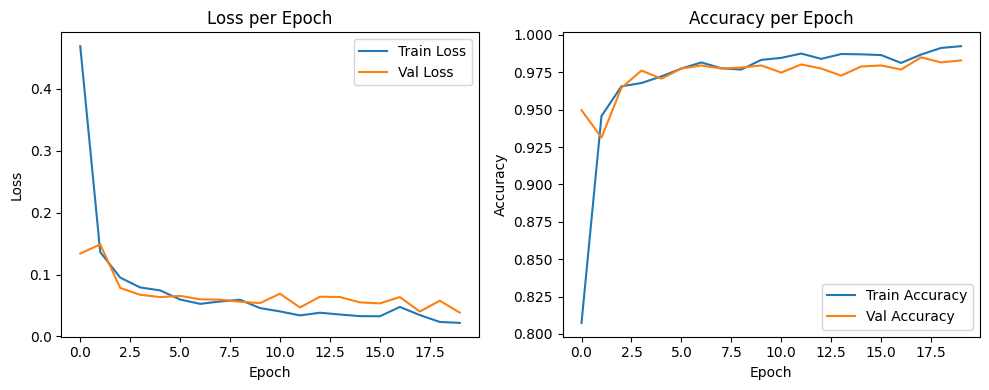

In [9]:
plt.figure(figsize=(10, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Summary

The model has been trained successfully and the best version was saved to:

📁 `../outputs/best_model.pth`

In the next notebook, we will evaluate the model on the test set using:
- Accuracy
- Confusion Matrix
- Classification Report
